# Complete-Case-Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\snehr\\Desktop\python\\dsjob.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [8]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [7]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
866,no_enrollment,Graduate,>20,1
171,no_enrollment,Masters,10,>4
154,no_enrollment,Graduate,13,4
1265,Part time course,Graduate,4,1
1561,no_enrollment,NaN,8,>4


In [9]:
df['education_level'].value_counts()

education_level
Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: count, dtype: int64

In [10]:
len(df[cols].dropna()) / len(df)

0.9478628464067638

In [12]:
new_df = df[cols].dropna()
df.shape , new_df.shape

((2129, 13), (2018, 4))

In [13]:
import matplotlib.pyplot as plt

<Axes: >

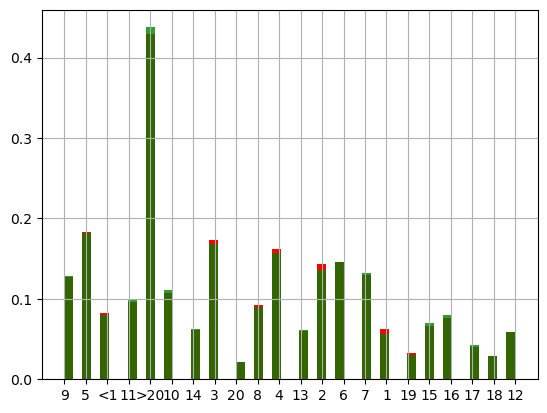

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

#  original data
df['experience'].hist(bins = 50 , ax = ax , density=True , color ='red')

# data after cca , the argument alpha makes the color transperant, so we can 
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax = ax , color='green' , density =True , alpha=0.8)

In [19]:
temp = pd.concat([
    # percentage of observations per category , original data 
    df ['enrolled_university'].value_counts() / len(df),

    # percentage of observations per category , cca data
    new_df['enrolled_university'].value_counts() / len(new_df)
],
                 axis =1)
# add.column names
temp.columns = ['original' , 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.713481,0.727948
Full time course,0.204321,0.202180
Part time course,0.067637,0.069871


In [20]:
temp = pd.concat([
    # percentage of observations per category , original data 
    df['education_level'].value_counts() / len(df), 

    # percentage of bobservation per category , cca data
    new_df['education_level'].value_counts() / len(new_df)
],
                 axis=1)
# add. column names
temp.coluns = ['original' , 'cca']

temp

C:\Users\snehr\AppData\Local\Temp\ipykernel_6868\4238437340.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  temp.coluns = ['original' , 'cca']


,count,count
education_level,,
Graduate,0.596054,0.611497
Masters,0.232973,0.239346
High School,0.104274,0.106541
Phd,0.025364,0.026264
Primary School,0.016909,0.016353
